## Generate PDF for sources

The idea here is to grab plots that I need for each source and put them in 1 single PDF file, one source per page

Each page will have :

-   Lya 1D+2D spectra with proper fit [DONE]
-   Lya S/N [DONE]
-   Ha 1D+2D with fit
-   Ha S/N
-   HST cutouts FRESCO + BINOSPEC pointing [DONE]


In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.io import ascii
import glob as glob
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from matplotlib.colors import LogNorm
from Tools import *
import xmatch
from matplotlib.patches import Circle, Rectangle

Catalog=ascii.read("../Catalogs/Binospec-Candels.cat")

## HST Cutout

In [34]:
hdu=fits.open("../data/large_files/hlsp_hlf_hst_wfc3-60mas_goodsn_f160w_v2.5_sci.fits")
Fresco=ReadCatalogs("../Catalogs/Fresco_latest.cat")
wcs1 = WCS(hdu[0].header)

idx,d2d=xmatch.xmatch(Catalog["ra_candels"],Catalog["dec_candels"],Fresco["ra"],Fresco["dec"])
FrescoCoord=[]
for i,d in zip(idx,d2d):
    Fres=Fresco[i]
    if d.value<(0.5/3600.):
        FrescoCoord.append([Fres["ra"],Fres["dec"]])
    else:
        FrescoCoord.append([np.nan,np.nan])




size = 5/3600*u.degree
for i,gal in enumerate(Catalog[:]):

    print(gal)
    position = SkyCoord(gal["ra_candels"]*u.deg,gal["dec_candels"]*u.deg)
    FrescPosition = SkyCoord(FrescoCoord[i][0]*u.deg,FrescoCoord[i][1]*u.deg)
    cutout = Cutout2D(hdu[0].data, position ,size, wcs = wcs1)
    ArcsecSize=int(np.round(len(cutout.data)/5))
    ax = plt.subplot(projection=cutout.wcs)

    ax.imshow(cutout.data,vmin=-0.01,vmax=5*np.std(cutout.data))
    ax.plot([5,5+ArcsecSize],[77,77],ls="-",color="white",lw=5)
    ax.scatter([0.5],[0.5],transform=ax.transAxes,color="Red",marker="x",alpha=0.8)




    ax.scatter(FrescPosition.ra,FrescPosition.dec,transform=ax.get_transform('world'),facecolors='none', edgecolors='r',marker="o",alpha=0.8,s=100)

    ax.text(0.13,0.85,s=r"1''",color="white",transform=ax.transAxes,fontsize=14)
    ax.text(0.6,0.9,s=str(gal["id_charlotte"]),color="white",transform=ax.transAxes,fontsize=10)
    ax.coords[1].set_format_unit(u.deg)
    ax.coords[0].set_format_unit(u.deg)
    ax.set_xlabel("RA")
    ax.set_ylabel("DEC")
    plt.savefig('Cutout/'+str(gal["id_charlotte"])+".pdf",dpi=200, bbox_inches = "tight")
    plt.clf()



id_candels id_charlotte  ra_candels  dec_candels    KPNO_U_FLUX    LBC_U_FLUX ACS_F435W_FLUX   ACS_F606W_FLUX    ACS_F775W_FLUX     ACS_F814W_FLUX   ACS_F850LP_FLUX    WFC3_F105W_FLUX    WFC3_F125W_FLUX  WFC3_F140W_FLUX  WFC3_F160W_FLUX     KPNO_U_FLUXERR   LBC_U_FLUXERR ACS_F435W_FLUXERR ACS_F606W_FLUXERR   ACS_F775W_FLUXERR  ACS_F814W_FLUXERR   ACS_F850LP_FLUXERR  WFC3_F105W_FLUXERR  WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR WFC3_F160W_FLUXERR  z  LyaFlux LyaErr LyaFWHM Skewness photoz IDFink      FluxLim         Type   HaFlux dHaFlux EWHa dEWHa HaFWHM dHaFWHM fesc dfesc voff dvoff zsys        Muv                dMuv              slope              dslope             EWLya        dEWLya LyaFWHM_int dLyaFWHM_int Asymmetry inFresco line
---------- ------------ ------------ ----------- ----------------- ---------- -------------- ----------------- ------------------ ----------------- ------------------ ------------------ ----------------- --------------- ------------------ ------------------

<Figure size 432x288 with 0 Axes>

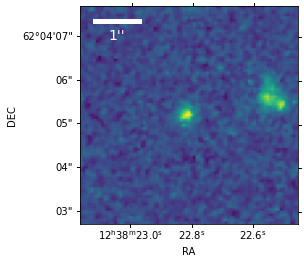

In [35]:
ax = plt.subplot(projection=wcs1)

ax.imshow(cutout.data)
ax.plot([5,5+ArcsecSize],[77,77],ls="-",color="white",lw=5)
ax.text(0.13,0.85,s=r"1''",color="white",transform=ax.transAxes,fontsize=14)
ax.set_xlabel("RA")
ax.set_ylabel("DEC")
plt.show()


In [38]:
def replace_underscore(input_string):
    """
    Replace underscore (_) with \_ in the input string.

    Args:
    input_string (str): The input string to be processed.

    Returns:
    str: The string with underscores replaced by \_.
    """
    return input_string.replace('_', '\\_')

In [40]:
for gal in Catalog:
    if gal["Type"]=="LAE" and gal["zsys"]>0:
        print(r"\begin{figure}")
        print(r"\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{LyaProfiles/"+str(gal["id_charlotte"])+".png}")
        print(r"\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/"+str(gal["id_charlotte"])+".pdf}")
        print(r"\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/"+str(gal["id_charlotte"])+".pdf}")
        print(r"\caption{$"+replace_underscore(str(gal["id_charlotte"]))+r"$ Ly$\alpha$ profile (Top) ,H$\alpha$ profile (Middle)}")
        print(r"\end{center}")
        print(r"\end{figure}")
        print(r"\clearpage")
    if gal["Type"]=="LAE" and np.isnan(gal["zsys"])==True:
        print(r"\begin{figure}")
        print(r"\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{LyaProfiles/"+str(gal["id_charlotte"])+".png}")
        #print(r"\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/"+str(gal["id_charlotte"])+".pdf}")
        print(r"\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/"+str(gal["id_charlotte"])+".pdf}")
        print(r"\caption{$"+replace_underscore(str(gal["id_charlotte"]))+r"$ Ly$\alpha$ profile}") 
        print(r"\end{center}")
        print(r"\end{figure}")
        print(r"\clearpage")
    if gal["Type"]=="NonDetect" and gal["zsys"]>0:
        print(r"\begin{figure}")
        #print(r"\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{LyaProfiles/"+str(gal["id_charlotte"])+".png}")
        print(r"\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/"+str(gal["id_charlotte"])+".pdf}")
        print(r"\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/"+str(gal["id_charlotte"])+".pdf}")
        print(r"\caption{$"+replace_underscore(str(gal["id_charlotte"]))+r"$ H$\alpha$ profile}") 
        print(r"\end{center}")
        print(r"\end{figure}")
        print(r"\clearpage")

    #if gal["Type"]=="NonDetect" and gal["zsys"]>0:
    #    print(3)


\begin{figure}
\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/z6_GND_16819.pdf}
\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/z6_GND_16819.pdf}
\caption{$z6\_GND\_16819$ H$\alpha$ profile}
\end{center}
\end{figure}
\clearpage
\begin{figure}
\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/z5_GND_14430.pdf}
\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/z5_GND_14430.pdf}
\caption{$z5\_GND\_14430$ H$\alpha$ profile}
\end{center}
\end{figure}
\clearpage
\begin{figure}
\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/z5_GND_30190.pdf}
\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/z5_GND_30190.pdf}
\caption{$z5\_GND\_30190$ H$\alpha$ profile}
\end{center}
\end{figure}
\clearpage
\begin{figure}
\begin{center}\includegraphics[width=12cm, trim=0.1cm 0cm 0cm -1cm]{HaProfiles/z5_GND_42418.pdf}
\includegraphics[width=9cm, trim=0.1cm 0cm 0cm -1cm]{Cutout/z5_GND_42418